 # GRUPO A
 ## Integrantes:
 -Armando Jhunior Mercado Echavarria
 
 -Valentina Olivas Sánchez
 
 -Dhómeli Mohena Yzarra Guarda
 
 -Juan Carlos Vivanco Guizado
 
 -Danixa Pierina Llalle Correa	
 
 -Waldo Jose Gómez Servan
 

### El valor agregado de nuestro trabajo final fue realizar una encuenta a los estudiantes de la facultad de economía y planificación que fue nuestra población .Nos respodieron 21 estudiantes que sería nuestra muestra , trabajamos con nuestra muestra ya que utilizamos el ESTADÍSTICO GAMMA.

## ESTADÍSTICO ($\gamma$)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import csv


In [3]:
##Leyendo un archivo csv con pandas
import pandas as pd
import csv
df = pd.read_csv("encuestaep.csv",encoding='latin1') # latin1 nos permite trabajar con tildes
df

,usuario,categoria,satisfaccion
0,1,A,regular
1,2,E,malo
2,3,D,regular
3,4,D,regular
4,5,B,regular
5,6,C,regular
6,7,D,malo
7,8,B,regular
8,9,B,regular
9,10,D,regular


In [4]:
tabla = pd.crosstab(index=df['satisfaccion'],
            columns=df['categoria'], margins=True)

In [5]:
tabla

categoria,A,B,C,D,E,All
satisfaccion,,,,,,
buena,0,0,3,0,1,4
malo,1,0,1,2,1,5
regular,1,3,3,5,0,12
All,2,3,7,7,2,21


In [8]:
for i in range(2):
    for j in range(2):
        print(tabla.iloc[i,j])

3
5
1
1


In [6]:
pd.crosstab(index=df['satisfaccion'], columns=df['categoria'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

categoria,A,B,C,D,E,All
satisfaccion,,,,,,
buena,0.000000,0.000000,14.285714,0.000000,4.761905,19.047619
malo,4.761905,0.000000,4.761905,9.523810,4.761905,23.809524
regular,4.761905,14.285714,14.285714,23.809524,0.000000,57.142857
All,9.523810,14.285714,33.333333,33.333333,9.523810,100.000000


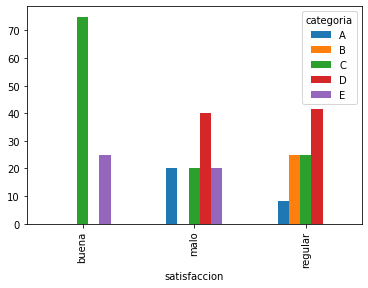

In [7]:
# Gráfico de barras 
plot = pd.crosstab(index=df['satisfaccion'],
            columns=df['categoria']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

## PANDAS Y ESTADÍSTICO GAMMA
Tomando como referencia una data pequeña sobre estrato vs opinión.

In [5]:
import pandas as pd
data = pd.read_csv("encuestaep.csv",encoding='latin1')

In [6]:
data

,usuario,categoria,satisfaccion
0,1,A,regular
1,2,E,malo
2,3,D,regular
3,4,D,regular
4,5,B,regular
5,6,C,regular
6,7,D,malo
7,8,B,regular
8,9,B,regular
9,10,D,regular


In [7]:
#Acomodando en una tabla de doble entrada
tabla_p = pd.crosstab(index=data['satisfaccion'],
            columns=data['categoria'], margins=True) #El margins es para colocar el total , suma filas , suma columnas
tabla_p

categoria,A,B,C,D,E,All
satisfaccion,,,,,,
buena,0,0,3,0,1,4
malo,1,0,1,2,1,5
regular,1,3,3,5,0,12
All,2,3,7,7,2,21


In [8]:
# CANTIDAD DE INDEX Y COLUMNS EN UNA TABLA
# ESTRATO             OPINIÓN
g = list(tabla_p.index)
f = list(tabla_p.columns)

print(g)
print(len(g)-1)

print(f)
print(len(f)-1)


['buena', 'malo', 'regular', 'All']
3
['A', 'B', 'C', 'D', 'E', 'All']
5


In [23]:
################TRABAJANDO CON POO##################
class EstaGamma:
    
    def __init__(self):
        pass
    
    def __str__(self):
        return("Ingresar en el método concordantes y discordantes (g,f) las filas en g y las columnas en f ,para hallar el estadÍstico gamma ingrese gamma() sin ningún atributo despues de haber hallado los discordantes y concordantes ya que estos ya estaran guardados")
    
    def concordantes(self,g,f):
        global c
        c=0
        k = list(range(len(g)-1)) #Creando lista desde el 0 hasta len(g)-1
        l = list(range(len(f)-1))  #Creando lista desde el 0 hasta len(f)-1
        for i in range(len(g)-1): # filas --> 3(En la tabla de la encuesta) 
            for j in range(len(f)-1): # columnas --> 5(En la tabla de la encuesta)
                s = 0
                print("------------------------------------")
                print("Estamos en el par (",i,",",j ,")y el valor de este es :",tabla_p.iloc[i,j])
                elemento = tabla_p.iloc[i,j]
                for x in k :
                    for y in l :
                        if  x > i:
                            if y > j :
                                print("El par ",(x,y)," es :",tabla_p.iloc[x,y])
                                s = s + tabla_p.iloc[x,y]
                print("La Suma de los valores de todos los pares hallados es ",s)
                print("El Producto seria ",s,"con ",elemento,"que resulta ->",s*elemento)
                c = c + elemento*s
         
        
        print("EL NUMERO TOTAL DE PARES CONCORDANTES ES" ,c)
        
    def discordantes(self,g,f):
        global d
        d = 0
        k = list(range(len(g)-1)) 
        l = list(range(len(f)-1))
        for i in range(len(g)-1): # filas --> 3(En la tabla de la encuesta )
            for j in range(len(f)-1): # columnas --> 5(En la tabla de la encuesta )
                s = 0
                print("--------------------------------------")
                print("Estamos en el par (",i,",",j,")y el valor de este es :",tabla_p.iloc[i,j])
                elemento = tabla_p.iloc[i,j]
                for x in k :
                    for y in l :
                        if  x > i:
                            if y < j :
                                print("El par ",(x,y)," es :",tabla_p.iloc[x,y])
                                s = s + tabla_p.iloc[x,y]
                print("La Suma de los valores de todos los pares hallados es ",s)
                print("El Producto seria ",s,"con ",elemento,"que resulta ->",s*elemento)
                d = d + elemento*s
                
       
        print("EL NUMERO TOTAL DE PARES DISCORDANTES ES" ,d)
    
    def gamma(self):
        eg = (c-d)/(c+d)
        if eg > -1 and eg < -0.1:
            print("El valor del estadistico gamma es cercano a -1 entonces se sugiere que hay una tendencia lineal decreciente(negativa) entre las dos variables")
        if eg > 0.1 and eg < 1:
            print("El valor del estadistico gamma es cercano a +1 entonces se sugiere que hay una tendencia lineal creciente(positiva) entre las dos variables")
        if eg > -0.1 and eg < 0.1:
            print("El valor del estadistico gamma es cercano a 0 entonces no se permite decidir sobre una asosiacion lineal significativa")
        
        

    
    

In [24]:
Ola= EstaGamma()
print(Ola)
Ola.concordantes(g,f)
Ola.discordantes(g,f)
Ola.gamma()

Ingresar en el método concordantes y discordantes (g,f) las filas en g y las columnas en f ,para hallar el estadÍstico gamma ingrese gamma() sin ningún atributo despues de haber hallado los discordantes y concordantes ya que estos ya estaran guardados
------------------------------------
Estamos en el par ( 0 , 0 )y el valor de este es : 0
El par  (1, 1)  es : 0
El par  (1, 2)  es : 1
El par  (1, 3)  es : 2
El par  (1, 4)  es : 1
El par  (2, 1)  es : 3
El par  (2, 2)  es : 3
El par  (2, 3)  es : 5
El par  (2, 4)  es : 0
La Suma de los valores de todos los pares hallados es  15
El Producto seria  15 con  0 que resulta -> 0
------------------------------------
Estamos en el par ( 0 , 1 )y el valor de este es : 0
El par  (1, 2)  es : 1
El par  (1, 3)  es : 2
El par  (1, 4)  es : 1
El par  (2, 2)  es : 3
El par  (2, 3)  es : 5
El par  (2, 4)  es : 0
La Suma de los valores de todos los pares hallados es  12
El Producto seria  12 con  0 que resulta -> 0
------------------------------------
E